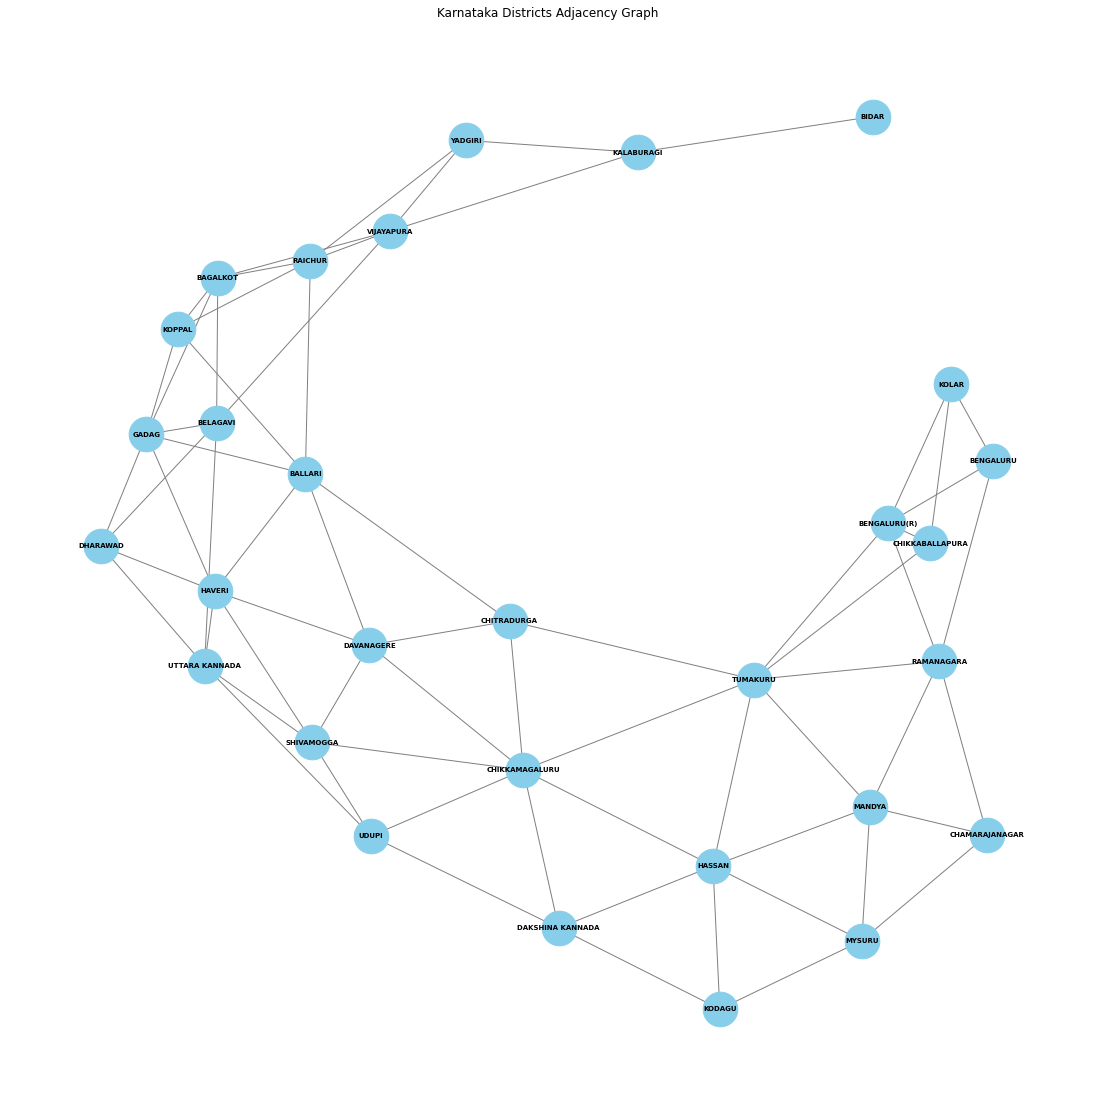

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

file_path = 'Karnataka_District_Adjacency_File.xlsx'
df = pd.read_excel(file_path)

num_districts = df['District_Code'].nunique()
adj_matrix = np.zeros((num_districts, num_districts), dtype=int)

for index, row in df.iterrows():
    current_district = row['District_Code'] - 1
    
    if isinstance(row['District_Neighbors'], int):
        neighbors = [row['District_Neighbors'] - 1]
    else:
        neighbors = [int(x) - 1 for x in row['District_Neighbors'].split(',')]

    adj_matrix[current_district, neighbors] = 1

G = nx.Graph(adj_matrix)

labels = {i: name for i, name in zip(range(num_districts), df['District_Name'])}

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, labels=labels, node_size=1200, node_color='skyblue', font_size=7, font_color='black', font_weight='bold', edge_color='gray')
plt.title('Karnataka Districts Adjacency Graph')
plt.show()


In [13]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, Circle
from bokeh.palettes import Spectral8
import networkx as nx
from bokeh.io.export import export_png 
import chromedriver_binary

file_path = 'Karnataka_District_Adjacency_File.xlsx'
df = pd.read_excel(file_path)

num_districts = df['District_Code'].nunique()
adj_matrix = np.zeros((num_districts, num_districts), dtype=int)

for index, row in df.iterrows():
    current_district = row['District_Code'] - 1
    
    if isinstance(row['District_Neighbors'], int):
        neighbors = [row['District_Neighbors'] - 1]
    else:
        neighbors = [int(x) - 1 for x in row['District_Neighbors'].split(',')]

    adj_matrix[current_district, neighbors] = 1

G = nx.Graph(adj_matrix)

pos = nx.spring_layout(G, seed=42)

margin = 0.1
x_range = (min(pos.values(), key=lambda x: x[0])[0] - margin, max(pos.values(), key=lambda x: x[0])[0] + margin)
y_range = (min(pos.values(), key=lambda x: x[1])[1] - margin, max(pos.values(), key=lambda x: x[1])[1] + margin)

plot = figure(title='Karnataka Districts Adjacency Graph', x_range=x_range, y_range=y_range,
              tools='', toolbar_location=None, width=1000, height=1000)

x, y = zip(*pos.values())

node_source = ColumnDataSource(data=dict(index=list(G.nodes), x=x, y=y, name=df['District_Name'].tolist(), code=df['District_Code'].tolist()))

circle = plot.circle('x', 'y', size=24, source=node_source, color=Spectral8[0], line_color='black', line_width=1)

hover = HoverTool(renderers=[circle], tooltips=[("District", "@name")])
plot.add_tools(hover)

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    
plot.line(edge_x, edge_y, line_color='gray', line_width=1)

output_notebook()
show(plot)

Loading BokehJS ...

In [15]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, Circle, LabelSet
from bokeh.palettes import Spectral8, Viridis256
import networkx as nx
from bokeh.io.export import export_png
import chromedriver_binary

# Read the data
file_path = 'Karnataka_District_Adjacency_File.xlsx'
df = pd.read_excel(file_path)

# Create the graph
num_districts = df['District_Code'].nunique()
adj_matrix = np.zeros((num_districts, num_districts), dtype=int)

for index, row in df.iterrows():
    current_district = row['District_Code'] - 1
    
    if isinstance(row['District_Neighbors'], int):
        neighbors = [row['District_Neighbors'] - 1]
    else:
        neighbors = [int(x) - 1 for x in row['District_Neighbors'].split(',')]

    adj_matrix[current_district, neighbors] = 1

G = nx.Graph(adj_matrix)

pos = nx.spring_layout(G, seed=42)

margin = 0.1
x_range = (min(pos.values(), key=lambda x: x[0])[0] - margin, max(pos.values(), key=lambda x: x[0])[0] + margin)
y_range = (min(pos.values(), key=lambda x: x[1])[1] - margin, max(pos.values(), key=lambda x: x[1])[1] + margin)

# Create the plot
plot = figure(title='Karnataka Districts Adjacency Graph', x_range=x_range, y_range=y_range,
              tools='', toolbar_location=None, width=1000, height=1000)

# Plot nodes
x, y = zip(*pos.values())
node_source = ColumnDataSource(data=dict(index=list(G.nodes), x=x, y=y, name=df['District_Name'].tolist(), code=df['District_Code'].tolist()))
circle = plot.circle('x', 'y', size=24, source=node_source, color=Spectral8[0], line_color='black', line_width=1)

# Hover tooltips for nodes
hover = HoverTool(renderers=[circle], tooltips=[("District", "@name"), ("Code", "@code")])
plot.add_tools(hover)

# Plot edges
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    
plot.line(edge_x, edge_y, line_color='gray', line_width=1, line_dash='dotted')
labels = LabelSet(x='x', y='y', text='name', level='glyph', source=node_source, text_baseline='middle', text_align='center', text_font_size='8pt')
plot.add_layout(labels)

output_notebook()
show(plot)


Loading BokehJS ...

In [3]:
export_png(plot, filename="district_adjacency_graph.png")

RuntimeError: Neither firefox and geckodriver nor a variant of chromium browser and chromedriver are available on system PATH. You can install the former with 'conda install -c conda-forge firefox geckodriver'.